In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
file = r'../Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/data.xlsx'
df = pd.read_excel(file,index_col=False)

In [3]:
irradiance_wls = [ ]
irradiance_cols = [ ]

for col in df.columns:
    m = re.match(r'\s*irradiance_(\d+)nm_.*_irradiance_uW_per_cm_squared\s*', col)
    if m:
        wl = int(m.group(1))
        irradiance_wls.append(wl)
        irradiance_cols.append(col)

In [4]:
irradiance_wls = np.array(irradiance_wls)

In [5]:
# If you're curious, you can check if the wavelengths are roughly linearly spaced.
# This doesn't actually matter for any basic linear algebra analysis like PCA.
#
# plt.figure()
# plt.plot(np.arange(len(irradiance_wls)), irradiance_wls, 'o-')
# plt.show()

In [6]:
n = len(df)
m = len(irradiance_wls)

In [7]:
(n, m)

(60, 18)

In [8]:
cube = np.zeros((n, m))

for i in range(n):
    for j in range(m):
        cube[i, j] = df[irradiance_cols[j]][i]

In [9]:
cube

array([[ 0.851,  0.962,  0.928, ...,  3.525,  0.556,  0.   ],
       [ 0.851,  0.962,  0.928, ...,  3.525,  0.556,  0.   ],
       [ 0.851,  0.962,  1.857, ...,  3.525,  0.556,  0.882],
       ...,
       [ 2.553,  3.849,  5.571, ..., 12.924,  2.223,  0.882],
       [ 2.553,  4.811,  6.499, ..., 12.924,  2.223,  1.765],
       [ 2.553,  4.811,  6.499, ..., 14.099,  2.778,  1.765]])

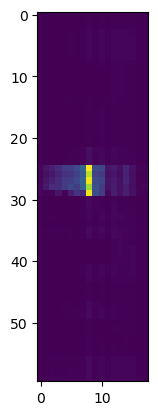

In [10]:
plt.figure()
plt.imshow(cube)
plt.show()